In [1]:
import glob
import torch
import os
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.ticker as mticker
from sklearn.mixture import GaussianMixture
from copy import copy

from src.utils.pickle_handler import *
from src.models.mixtures.squared_nm_gaussian_mixture import NMSquaredGaussianMixture

/Users/patricktourniaire/opt/miniconda3/envs/nmmm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
datasets = [
    ("ring", "Ring"), 
    ("funnel", "Funnel"), 
    ("banana", "Banana"), 
    ("mor", "MoR"), 
    ("cosine", "Cosine"), 
    ("spiral", "Spiral")
]

datasets_vis = {}

for name, title in datasets:
    data = load_object('data/train', name)
    datasets_vis[name] = {
        'data': data,
        'title': title
    }

In [5]:
datasets_vis

{'ring': {'data': array([[ 4.83020336,  1.77291624],
         [-3.01471124,  3.62987448],
         [-2.77044553, -4.49088676],
         ...,
         [ 4.95491609, -0.01927076],
         [-3.01547011, -3.93693308],
         [ 5.23063982,  0.52603071]]),
  'title': 'Ring'},
 'funnel': {'data': array([[ 1.01377201, -0.33251897],
         [ 1.48858173,  0.2327574 ],
         [-1.63956464, -1.23093159],
         ...,
         [-0.44203277, -1.1939863 ],
         [-2.37765079, -0.37896172],
         [-1.25891557,  1.62635042]]),
  'title': 'Funnel'},
 'banana': {'data': array([[ 1.01377201, -1.14647251],
         [ 1.48858173,  0.13311738],
         [-1.63956464, -0.80462483],
         ...,
         [-0.44203277, -1.71814445],
         [-2.37765079,  0.21080644],
         [-1.25891557,  0.38362436]]),
  'title': 'Banana'},
 'mor': {'data': array([[ 4.83020336,  1.77291624],
         [-0.45907225,  0.55274768],
         [-2.77044553, -4.49088676],
         ...,
         [-3.25884493,  3.8029

In [58]:
def plot_shape(ax, title, data):
    samples = data

    x, y = samples[:,0], samples[:,1]

    ax.axvline(c='grey', lw=1, alpha=.5)
    ax.axhline(c='grey', lw=1, alpha=.5)
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    
    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    ax.set_aspect(asp)
    
    ax.scatter(x, y, s=1)

    ax.set_title(title, fontsize=20, pad=20)
    
    ax.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

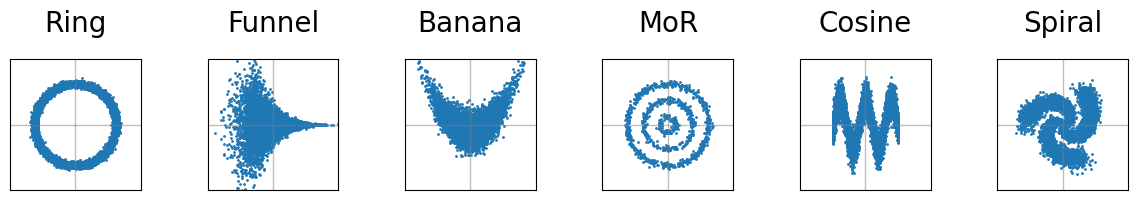

In [61]:
fig, axs = plt.subplots(1, len(datasets), figsize=(2*len(datasets), 2))

for i, (name, entry) in enumerate(datasets_vis.items()):
    plot_shape(axs[i], entry['title'], entry['data'])

   
fig.tight_layout()
fig.savefig('dataset_shapes.png', format='png', dpi=1200)